<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/Data%20Preprocessing/Data_PreProcessing_Missing_Data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## References
https://harvard-iacs.github.io/2021-CS109A/lectures/lecture09/notebook/#:~:text=The%20msno.,out%20patterns%20in%20data%20completion.&text=The%20sparkline%20on%20the%20right,minimum%20nullity%20in%20the%20dataset.

# Detecting Missing Values
-Null and nan
- Completely missing data
- Data which is missing and indicated by some character or string like "NA,-,?.0 etc"
-Usually filled with values like 'NA', '-' or '.' etc.
 -- Identify the data as nan while loading


# Amount of missingness
 - find the sum of null values for each column
# Visualizing Missing Values-
Using Missingo - using frequency

# Identify Missingness Pattern
- MCAR
- MNAR
- MAR

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# What Are Missing Values and Why It is Important to Handle Them

In [99]:
# NaN vs Null Value-What is considered missing value

# Detecting Missing Values in a Dataset

In [100]:
df_loan=pd.read_csv('madfhantr (1).csv')
df_loan.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
270,LP001888,Female,No,0,Graduate,No,3237,0.0,30.0,360.0,1.0,Urban,Y
252,LP001841,Male,No,0,Not Graduate,Yes,2583,2167.0,104.0,360.0,1.0,Rural,Y
317,LP002036,Male,Yes,0,Graduate,No,2058,2134.0,88.0,360.0,NaN,Urban,Y
558,LP002798,Male,Yes,0,Graduate,No,3887,2669.0,162.0,360.0,1.0,Semiurban,Y
437,LP002401,Male,Yes,0,Graduate,No,2213,1125.0,NaN,360.0,1.0,Urban,Y
549,LP002777,Male,Yes,0,Graduate,No,2785,2016.0,110.0,360.0,1.0,Rural,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
25,LP001066,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y
59,LP001199,Male,Yes,2,Not Graduate,No,3357,2859.0,144.0,360.0,1.0,Urban,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N


In [101]:
loan_null=df_loan.isnull()
loan_null

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [102]:
loan_null.sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [103]:
df_diabetes=pd.read_csv('diabetes.csv')
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [104]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [105]:
# amount of missingness
df_diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [106]:
col_missing=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in col_missing:
    df_diabetes.loc[df_diabetes[col] == 0, col] = np.nan


In [107]:
# amount of missingness
df_diabetes.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [108]:
# find percentage of missing values
percentage_diabetes_null=df_diabetes.isna().mean()*100
percentage_diabetes_null

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

# visualizing amount of missing values

In [116]:
import missingno as msno


msno.bar is a simple visualization of nullity by column

<Axes: >

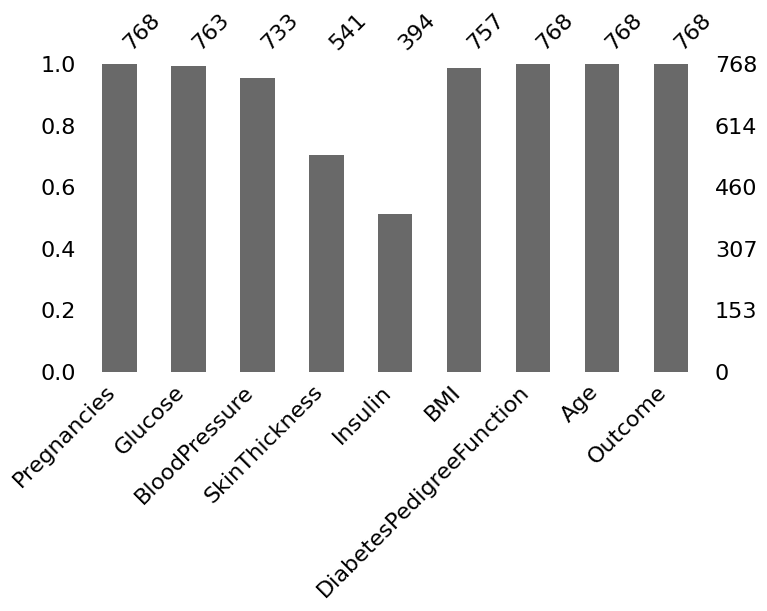

In [119]:
msno.bar(df_diabetes,figsize=(8, 4))


<Axes: >

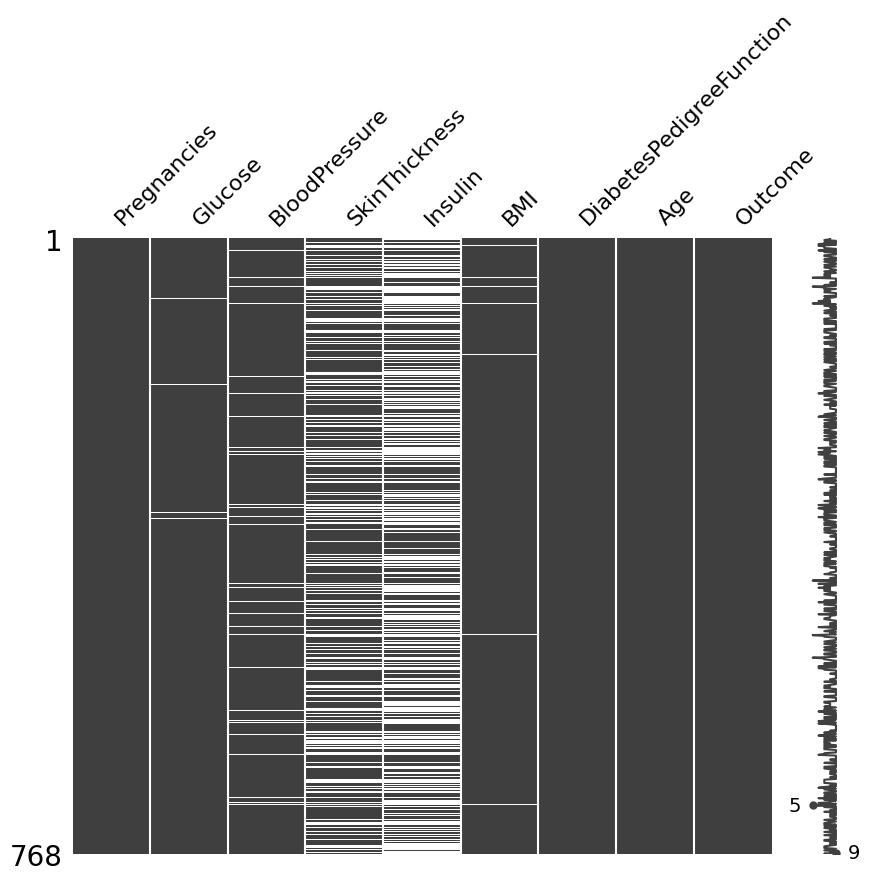

In [123]:


msno.matrix(df_diabetes,figsize=(10, 8))


The sparkline on the right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.



# Finding Pattern in Missing Data
- MCAR
- MAR
- MNAR

<Axes: >

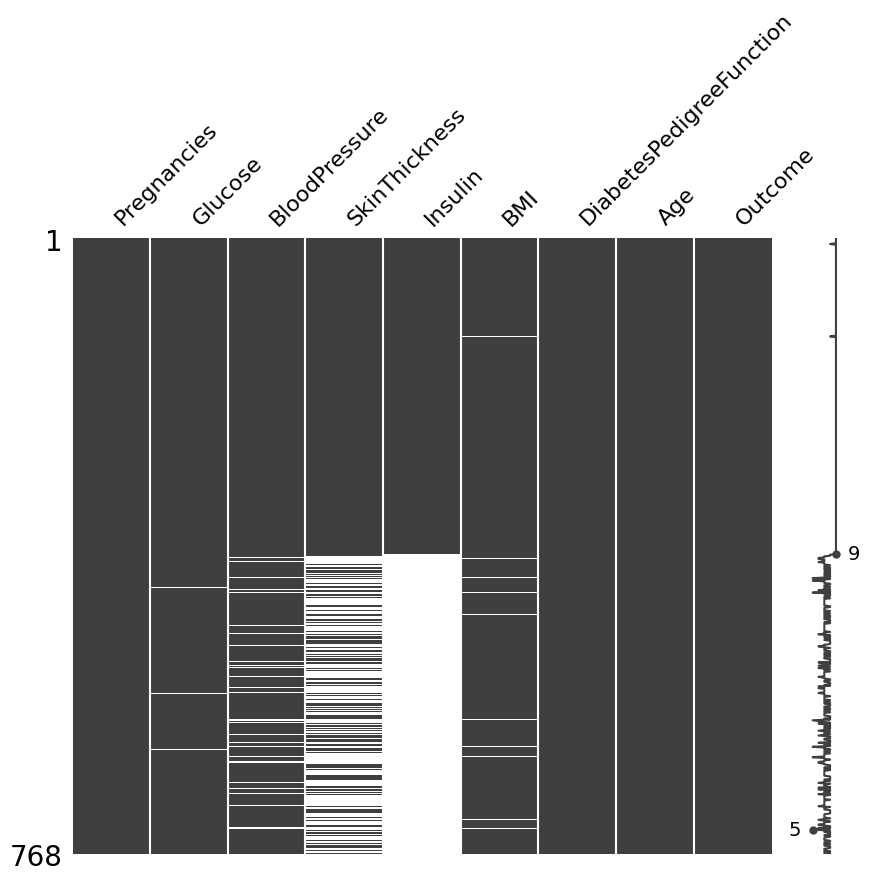

In [127]:
# Sort diabetes dataframe on 'Insulin'
sorted_values = df_diabetes.sort_values('Insulin')
msno.matrix(sorted_values,figsize=(10,8))